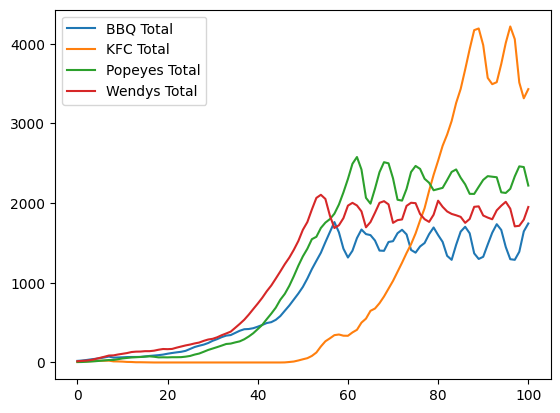

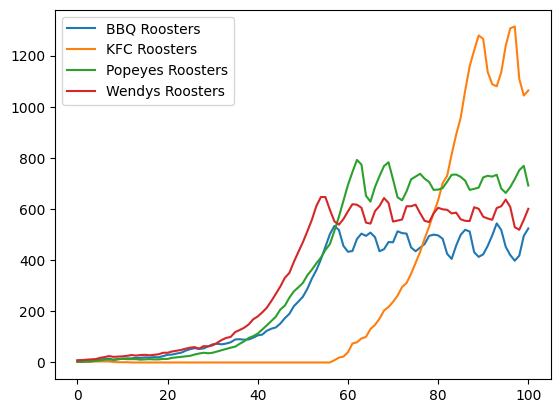

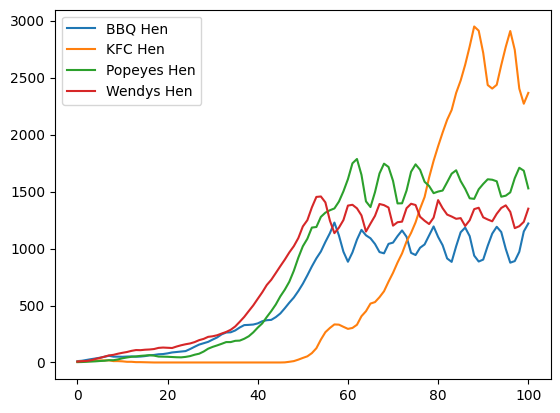

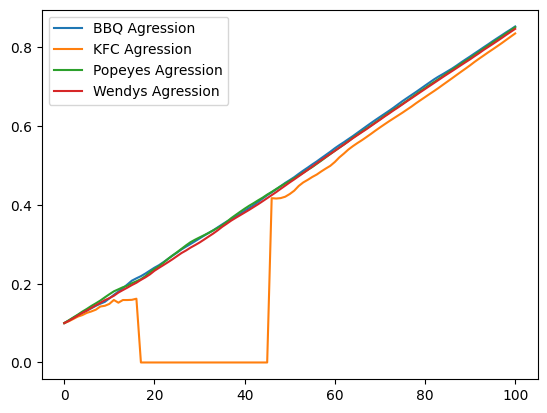

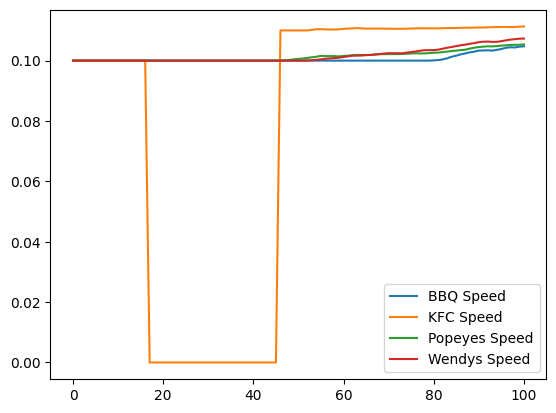

In [1]:
import sim
import matplotlib.pyplot as plt


nests = {
    "BBQ": {
        "nest"  : sim.Nest("BBQ", 2000, 20)
        , "roads" : [("KFC",0.40)]
    }
    , "KFC": {
            "nest"  : sim.Nest("KFC", 5000, 10)
        , "roads" : [("BBQ",0.40), ("Popeyes",0.70), ("Wendys",0.50)]
    }
    , "Popeyes": {
        "nest"  : sim.Nest("KFC", 3000, 5)
        , "roads" : [("KFC",0.70), ("Wendys", 0.30)]
    }
    , "Wendys": {
        "nest"  : sim.Nest("Wendys", 2500, 15)
        , "roads" : [("KFC", 0.50), ("Popeyes", 0.30)]
    }
    # Nest template
    # ,  "": {
    #     "nest"  : Nest("", , )
    #   , "roads" : [("", 0.)]
    # }
}

# Go through nests and create the world
for nest in nests:
    for n, d in nests[nest]["roads"]:
        nests[nest]["nest"].createRoad(n, d)

# Simulated the world
for i in range(sim.cycles):

    # Simulate all the nests for this cycle
    for nest in nests:
        nests[nest]["nest"].simulateCycle()
    
    # Move around the travellers
    for nest in nests:
        tr = nests[nest]["nest"].getTravelers()
        if tr["gender"] == "male":
            while len(tr["chickens"]) > 0:
                ch = tr["chickens"].pop()
                nests[ch["nest"]]["nest"].roosters.append(ch["chicken"])
        else:
            while len(tr["chickens"]) > 0:
                ch = tr["chickens"].pop()
                nests[ch["nest"]]["nest"].hens.append(ch["chicken"])
        


# plt.figure(figsize=(10, 18), dpi=80)
x = list(range(0, sim.cycles + 1))
for nest in nests:
    plt.figure(1)
    plt.plot(x, nests[nest]["nest"].data.tData, label=f"{nest} Total")        
    plt.figure(2)
    plt.plot(x, nests[nest]["nest"].data.rData, label=f"{nest} Roosters")        
    plt.figure(3)
    plt.plot(x, nests[nest]["nest"].data.hData, label=f"{nest} Hen")        
    plt.figure(4)
    plt.plot(x, nests[nest]["nest"].data.agAve, label=f"{nest} Agression")
    plt.figure(5)
    plt.plot(x, nests[nest]["nest"].data.spAve, label=f"{nest} Speed")


plt.figure(1)
plt.legend()
plt.figure(2)
plt.legend()
plt.figure(3)
plt.legend()
plt.figure(4)
plt.legend()
plt.figure(5)
plt.legend()

plt.show()

